# Lesson 3: Univariate Exploration of Data
## Screencast Script

(Make sure that you've downloaded `pokemon.csv` to be able to run the cells in
this notebook!)

> Hi there! I hope you're ready to start using Python to visualize your data.
In this course, we will use numpy and pandas to store our data and we will use 
matplotlib and seaborn to create our visualizations. You might see the
abbreviation 'sns' for seaborn, but I'll be using 'sb' in this course. We will
also write and run all of our code using Jupyter notebooks; this magic command,
`%matplotlib inline`, allows plots to be rendered directly inside the notebook.

In [1]:
# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load in the data

pokemon = pd.read_csv('pokemon.csv')

> In this lesson, we're going to make use of this dataset comprised of
attributes of creatures in the video game series Pokémon. The dataset consists
of 807 rows by 14 columns, which include both categorical and numeric features.

In [3]:
# take a basic look at the data
pokemon.head(10)

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65
5,6,charizard,1,1.7,90.5,240,fire,flying,78,84,78,100,109,85
6,7,squirtle,1,0.5,9.0,63,water,NaN,44,48,65,43,50,64
7,8,wartortle,1,1.0,22.5,142,water,NaN,59,63,80,58,65,80
8,9,blastoise,1,1.6,85.5,239,water,NaN,79,83,100,78,85,105
9,10,caterpie,1,0.3,2.9,39,bug,NaN,45,30,35,45,20,20


## 3.3 Bar Charts

### Main Points

1. How to create a basic bar chart.
2. How to reorder bars for a bar chart, either by frequency or by ordinal sorting.
3. How to create a horizontal bar chart.

> To start off with, let's create a bar chart on one of the categorical
variables in the dataset: `generation id`. Even though the values in the column
look numeric, they're actually just categorical labels, indicating when each
species was introduced to the series from 1st generation to 7th generation.
> 
> To create a bar chart, we want to make use of the seaborn function
"countplot". We set the data source, the `pokemon` dataframe, on the data
parameter, and the variable of interest, the `generation_id` column, on the x
parameter. It's not absolutely necessary, but I've added a semicolon to the end
of the expression to suppress printing of the plotting object information.

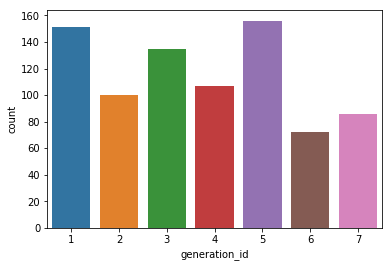

In [4]:
# create a basic bar chart
sb.countplot(data = pokemon, x = 'generation_id');

> We can see from the plot that the most Pokémon were introduced in generations
1, 3, and 5, with the fewest in generations 6 and 7. One thing that bothers me
about the default settings is that each bar is illustrated using a different
color. The generation number is already encoded by position on the x-axis, and
we don't have a good reason right now to associate each generation with a color.
It's better to start by plotting everything in one color to avoid being distracted.
>
> I will obtain my color value using seaborn's "color_palette" function. This
function returns a list of tuples corresponding to the color palette set in the
function's arguments. Since I haven't specified any parameters, I'll just get back
the current, default palette. I slice off index 0 to get the first tuple in the list,
and store it in the `base_color` variable. Then, in the countplot function, I'll set
the value of the "color" parameter to this tuple. The revised plot looks like this: much cleaner.

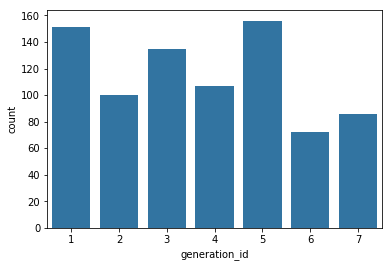

In [5]:
# color is somewhat extraneous, so let's make it more uniform.
base_color = sb.color_palette()[0]
sb.countplot(data = pokemon, x = 'generation_id', color = base_color);

> One thing we might want to do with the plot now is to sort the generations in
order by number of Pokémon species that were introduced. This can be done with
the "order" parameter in the "countplot" function. This parameter takes as an
argument a list with the order in which bars should be plotted.
>
> We could approach this by hard-coding the values based on what we see in the
unsorted plot. A better approach is to write some code to obtain that order
programmatically. The pandas Series function "value_counts" is valuable here.
This function counts the frequency of each unique value in the Series and
sorts them in descending order. In order to get the bar order, we want the
index values, then store them in a variable. We pass this to the order
parameter to get the sorted bar chart:

In [6]:
pokemon['generation_id'].value_counts()

5    156
1    151
3    135
4    107
2    100
7     86
6     72
Name: generation_id, dtype: int64

In [7]:
# let's try ordering the bars by count.
gen_order = pokemon['generation_id'].value_counts().index

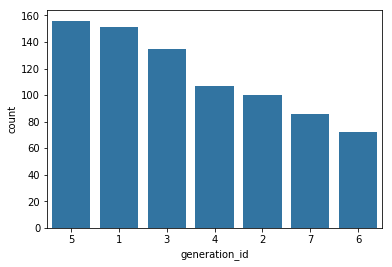

In [8]:
# creating the sorted bar chart
sb.countplot(data = pokemon, x = 'generation_id', color = base_color, order = gen_order);

> Let's move on to a different categorical variable: Pokémon type. Each species
has one or two 'types' that play a part in each creature's offensive and
defensive capabilities. For now, let's just take a look at the distribution of
first Pokemon types. When we generate the bar chart, we can see that the bar
labels on the x-axis are mostly unreadable due to overlap.

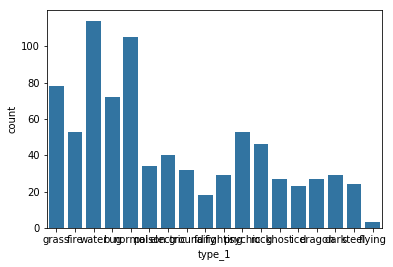

In [9]:
# let's look at the same thing for primary pokemon types.
sb.countplot(data = pokemon, x = 'type_1', color = base_color);

> One thing that we might do is make use of matplotlib's "xticks" function to
rotate the category labels. By setting `rotation = 90`, the labels are turned
90 degrees counter-clockwise and no longer overlap.

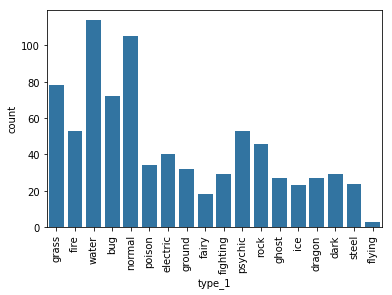

In [10]:
# there's some clear overlap between type names. We might turn the labels sideways:
sb.countplot(data = pokemon, x = 'type_1', color = base_color);
plt.xticks(rotation = 90);

> An alternative strategy is to create a horizontal bar chart. In seaborn, this
is as simple as changing the x parameter into a y. Now, the levels of the
type variable are listed on the vertical axis, with frequency shown on the
x-axis.

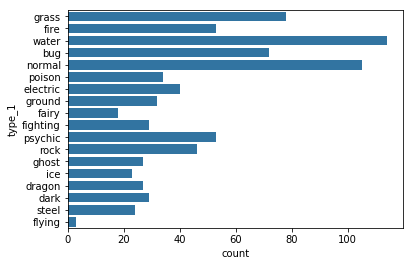

In [11]:
# but we might be better off creating a horizontal plot instead.
sb.countplot(data = pokemon, y = 'type_1', color = base_color);

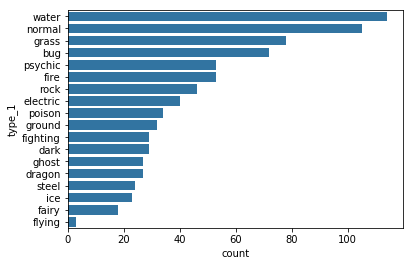

In [12]:
# and here's that plot sorted by type frequency.
type_order = pokemon['type_1'].value_counts().index
sb.countplot(data = pokemon, y = 'type_1', color = base_color, order = type_order);

> Once we sort the plot by type frequency, we can see that "Water" and "Normal"
types are the most common first type taken by Pokémon, while "Flying" is the
least common first type.

## 3.4 Absolute vs. Relative Frequency

### Main Points

1. Change axis labels or use aggregation to show relative frequency on the vertical axis.
2. Use text to annotate a bar chart with relative frequencies or count to supplement axis.

In [13]:
# creating a data frame with all of the pokemon types
pkmn_types = pokemon.melt(id_vars = ['id','species'], 
                          value_vars = ['type_1', 'type_2'], 
                          var_name = 'type_level', value_name = 'type').dropna()
pkmn_types.head(10)

,id,species,type_level,type
0,1,bulbasaur,type_1,grass
1,2,ivysaur,type_1,grass
2,3,venusaur,type_1,grass
3,4,charmander,type_1,fire
4,5,charmeleon,type_1,fire
5,6,charizard,type_1,fire
6,7,squirtle,type_1,water
7,8,wartortle,type_1,water
8,9,blastoise,type_1,water
9,10,caterpie,type_1,bug


In [ ]:
# create a horizontal bar chart, similar to before.
type_counts = pkmn_types['type'].value_counts()
type_order = type_counts.index

base_color = sb.color_palette()[0]
sb.countplot(data = pkmn_types, y = 'type', color = base_color, order = type_order);

> Last time we left off by creating a bar chart of Pokémon by their first type.
I've performed some data wrangling to obtain a data frame with both first and
second types in a single column. I've created some variables to get the types in
order of frequency, then plotted those counts in a bar chart. One
thing I'm interested in now is what proportion of Pokémon have each type. While
I might be able to estimate this from the plot by knowing the total number of
Pokémon, it's probably better to just show it directly in the visualization.
>
> One way of doing this is to use matplotlib to change the tick marks from labeling
absolute counts to relative counts. Let's start by creating a list of tick positions.
We start by computing the length of the longest bar, in terms of proportion. The
original `pokemon` dataframe gives us the denominator, and we use "value_counts" to
get the numerator.

In [ ]:
n_pokemon = pokemon.shape[0]
max_type_count = type_counts[0]
max_prop = max_type_count / n_pokemon
print(max_prop)

> Now, we use numpy's "arange" function to produce a set of evenly-spaced proportion
values between 0 and the max in steps of 2 percent, storing the values in the
`tick_props` variable. I'm also using a list comprehension to create an additional
variable, `tick_names`, to apply to the tick labels. These strings will show the
proportions with a consistent two decimal places. Now we're ready to modify our plot.
>
> To change the tick locations and labels, we use matplotlib's "xticks" function. The
first argument sets the tick positions. Since the counts are still in absolute value, we
need to multiply `tick_props` by the number of Pokémon to get their position correct. The
second argument sets the tick labels. We need to use both arguments here since the
positions and their values are different. Finally, we use the "xlabel" function to change
the x-axis label from the default 'count' to the more appropriate 'proportion'.

In [ ]:
tick_props = np.arange(0, max_prop, 0.02)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

base_color = sb.color_palette()[0]
sb.countplot(data = pkmn_types, y = 'type', color = base_color, order = type_order)
plt.xticks(tick_props * n_pokemon, tick_names)
plt.xlabel('proportion');

> The resulting plot shows us that about 16% of all Pokémon include the "Water"
type, all the way down to only 4% that include the Ice type.
>
> Alternatively, maybe we want to have the axis in terms of counts, and use text
on the bars to show proportion. This is where the flexibility of matplotlib can
shine. We use a loop to place text elements one by one. The first argument to
the text function is the x-position, just after the end of the bar. The second
argument is the y-position, which starts at 0 and increments with the loop. The
third argument is the string to be printed. Finally, I've added an optional
parameter, "va", to center the vertial alignment of text on each bar. The final
plot looks like this:

In [ ]:
sb.countplot(data = pkmn_types, y = 'type', color = base_color, order = type_order)

for i in range(type_counts.shape[0]):
    count = type_counts[i]
    pct_string = '{:0.1f}%'.format(100*count/n_pokemon)
    plt.text(count+1, i, pct_string, va = 'center')

## 3.8 Histograms

### Main Points

1. How to create a basic histogram.
2. How to select different bin widths.

> Now, let's take a look at some numeric variables in this dataset. Let's
start this example by looking at Pokémon speed: the higher the value, the
sooner they will act in battle. Matplotlib has a built-in function for
creating histograms: the "hist" function. We can create the basic histogram
in the same way as the bar chart: data set to the pokemon dataframe and x
to the "speed" variable.

In [ ]:
plt.hist(data = pokemon, x = 'speed');

> The distribution of speed values appears unimodal and slightly
right skewed, but there isn't a lot of detail here. By default,
matplotlib will split the data into ten bins, which is usually too
few. In addition, the bin boundaries are not particularly aligned
with the tick marks, making interpretation trickier.
>
> To solve this, we want to use the bins parameter of the "hist"
function. If we set an integer value for the bins, such as 20, then
that will set the number of bins that will be used for plotting.
However, this still has the problem of awkward bin boundaries.
You can see the bin edges and counts returned by hist when I remove
the semicolon. The fact that bin edges are non-integer, and the data
values are integer, will mean that some bins cover more integer values
than others.

In [ ]:
plt.hist(data = pokemon, x = 'speed', bins = 20);

> Instead, a better way of making use of the bins parameter is to 
specify the bin boundaries explicitly. Here, I'll make use of numpy's
"arange" function to create bins of size 5. The reason why I add the
+5 to the second argument is that the values generated by arange will
_not_ include the maximum value: only those strictly lower than the max.
Adding +5 means that all values should be represented in the chart.
>
> This view of the data implies that the data is approximately unimodal,
save for a bit of a dip in the 75 to 85 range.

In [ ]:
bins = np.arange(0, pokemon['speed'].max()+5, 5)
plt.hist(data = pokemon, x = 'speed', bins = bins);

> What if we try an extremely small bin size, like 1? On the one
hand, this bin size is perhaps a bit too small, introducing a lot
of noise in the plot. On the other hand, this shows that Pokémon
"speed" statistics are usually divisible by five.

In [ ]:
bins = np.arange(0, pokemon['speed'].max()+1, 1)
plt.hist(data = pokemon, x = 'speed', bins = bins);

> Seaborn also has a function for creating histograms, "distplot".
Unlike the countplot and hist functions seen before, the main argument
taken by the function is just the pandas series containing all the data.
You'll notice two things about this plot. First of all, the default bin
count is larger than in matplotlib. Secondly, you'll notice that a line
has been plotted over the bars, with the y-axis values very small
proportions. This is a density curve estimate of the data distribution,
such that the total area under the curve is equal to 1. If you're
interested in this kind of plot, you can read up more about this in the
extras at the end of the lesson.

In [ ]:
sb.distplot(pokemon['speed']);

> You can turn off the density curve by setting the parameter
`kde = False`. However, at this point, you're back to the basic
histogram, and might as well just use matplotlib's hist function
from the start.

In [ ]:
sb.distplot(pokemon['speed'], kde = False);

## 3.11 Descriptive Statistics, Outliers, and Axis Limits

### Main Points

1. Setting axis limits for histograms.

> Let's try creating another histogram of a different Pokémon attribute:
height. The units for this variable are in meters. A plot of the statistic
shows that it's fairly right-skewed, with fairly few points above 6 meters
in value. It might be worth doing a zoom in of the main bulk of the data
through the use of axis limits.

In [ ]:
bins = np.arange(0, pokemon['height'].max()+0.5, 0.5)
plt.hist(data = pokemon, x = 'height', bins = bins);

> We can use the matplotlib function "xlim" to set the upper and
lower bounds of the bins that will be displayed in the plot. It takes
as an argument a list or tuple of two values specifying these limits.
In this case, I've set the axis limits from 0 to 6, and changed the
bin size in anticipation of this reduced axis limit.
>
> In this case, there's not much additional illumination provided by
the trimmed axis limits. Most Pokémon species are human-sized or
smaller, with relatively few that tower larger.

In [ ]:
bins = np.arange(0, pokemon['height'].max()+0.2, 0.2)
plt.hist(data = pokemon, x = 'height', bins = bins)
plt.xlim((0,6));

## 3.12 Scales and Transformations

### Main Points

1. Setting a scale using matplotlib.
2. Setting tick marks and labels.

> Last time we looked at height; what should we make of Pokémon
weight? The units for this variable are in terms of kilograms. The
histogram of this variable is even more skewed than the height
histogram, with some species with value over 800 kilograms. Rather
than trim the axis limits like before, we'll try an axis transform
instead.

In [ ]:
bins = np.arange(0, pokemon['weight'].max()+40, 40)
plt.hist(data = pokemon, x = 'weight', bins = bins);

> Matplotlib's "xscale" function will do the trick. If we only
add this line to the plotting code, we end up with a very
odd-looking plot. The bar heights are still the same, but
they're wide on the left and thin on the right. In order to
get the plot more interpretable, we need to modify the bin
boundaries and generate more informative axis ticks.

In [ ]:
bins = np.arange(0, pokemon['weight'].max()+40, 40)
plt.hist(data = pokemon, x = 'weight', bins = bins)
plt.xscale('log');

> First, let's discuss the bins. The minimum weight is 0.1, and
the maximum 999.9. The log of these values, base 10, are -1 and
a hair under 3. Our bin edges will be 10 to the power of values
between -1 and 3, so that they are evenly spaced after taking the
logarithm. The plot is looking better now, showing a unimodal
distribution, but the tick marks could be more interpretable.

In [ ]:
print(pokemon['weight'].min(), pokemon['weight'].max())

In [ ]:
print(np.log10([pokemon['weight'].min(), pokemon['weight'].max()]))

In [ ]:
bins = 10 ** np.arange(-1, 3.0+0.1, 0.1)
plt.hist(data = pokemon, x = 'weight', bins = bins)
plt.xscale('log');

> We can start with writing out the given ticks, but we might want to add more.
Here's where we need to do some hard-coding, since outside of
the whole powers of ten, there aren't nice, evenly spaced intermediate
values. We can still get close, however. A '3' is about halfway
between consecutive powers of 10 on a log scale. Adding these values
to our ticks list completes our exploratory plot. It's much easier to
read that the most common weights are between 10 and 100 with these
tick labels.

In [ ]:
bins = 10 ** np.arange(-1, 3.0+0.1, 0.1)
ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
labels = ['{}'.format(val) for val in ticks]

plt.hist(data = pokemon, x = 'weight', bins = bins)
plt.xscale('log')
plt.xticks(ticks, labels);